# 🔍 Exploración de Datos - Sistema de Matcheo LunaJoy
 
 Este notebook permite explorar y visualizar los datos generados para el sistema de matcheo de LunaJoy.


In [1]:
# ## 1. Importar librerías y cargar datos

# %%
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# Cargar datos
print("📂 Cargando archivos JSON...")

with open('clinicians.json', 'r', encoding='utf-8') as f:
    clinicians = json.load(f)
    
with open('users.json', 'r', encoding='utf-8') as f:
    users = json.load(f)
    
with open('interactions.json', 'r', encoding='utf-8') as f:
    interactions = json.load(f)
    
with open('sessions.json', 'r', encoding='utf-8') as f:
    sessions = json.load(f)

print(f"✅ Datos cargados:")
print(f"   - Clínicos: {len(clinicians):,}")
print(f"   - Usuarios: {len(users):,}")
print(f"   - Interacciones: {len(interactions):,}")
print(f"   - Sesiones: {len(sessions):,}")

📂 Cargando archivos JSON...
✅ Datos cargados:
   - Clínicos: 300
   - Usuarios: 2,500
   - Interacciones: 69,517
   - Sesiones: 34,142


In [3]:
# ## 3. Funciones de utilidad para explorar datos individuales

# %%
def show_clinician(clinician_id=None):
    """Muestra información detallada de un clínico"""
    if clinician_id is None:
        # Seleccionar uno aleatorio
        clinician = clinicians[np.random.randint(0, len(clinicians))]
    else:
        clinician = next((c for c in clinicians if c['clinician_id'] == clinician_id), None)
        if not clinician:
            print(f"❌ No se encontró clínico con ID: {clinician_id}")
            return
    
    print("👨‍⚕️ INFORMACIÓN DEL CLÍNICO")
    print("=" * 50)
    print(f"ID: {clinician['clinician_id']}")
    print(f"Nombre: {clinician['basic_info']['full_name']}")
    print(f"Estados con licencia: {', '.join(clinician['basic_info']['license_states'])}")
    print(f"Tipos de cita: {', '.join(clinician['basic_info']['appointment_types'])}")
    
    print(f"\n📋 PERFIL PROFESIONAL:")
    print(f"Género: {clinician['profile_features']['gender']}")
    print(f"Idiomas: {', '.join(clinician['profile_features']['languages'])}")
    print(f"Años de experiencia: {clinician['profile_features']['years_experience']}")
    print(f"Especialidades: {', '.join(clinician['profile_features']['specialties'][:5])}")
    if len(clinician['profile_features']['specialties']) > 5:
        print(f"                ...y {len(clinician['profile_features']['specialties']) - 5} más")
    
    print(f"\n⏰ DISPONIBILIDAD:")
    print(f"Disponibilidad inmediata: {'✅ Sí' if clinician['availability_features']['immediate_availability'] else '❌ No'}")
    print(f"Aceptando nuevos pacientes: {'✅ Sí' if clinician['availability_features']['accepting_new_patients'] else '❌ No'}")
    print(f"Pacientes actuales: {clinician['availability_features']['current_patient_count']}/{clinician['availability_features']['max_patient_capacity']}")
    print(f"Score de disponibilidad: {clinician['availability_features']['availability_score']:.2f}")
    
    if clinician['performance_metrics']['avg_patient_rating']:
        print(f"\n📊 MÉTRICAS DE DESEMPEÑO:")
        print(f"Rating promedio: ⭐ {clinician['performance_metrics']['avg_patient_rating']}/5.0")
        print(f"Tasa de retención: {clinician['performance_metrics']['retention_rate']*100:.1f}%")
        print(f"Total de pacientes atendidos: {clinician['performance_metrics']['total_patients_seen']}")
    
    print(f"\n💰 TARIFAS Y SEGUROS:")
    print(f"Seguros aceptados: {len(clinician['admin_data']['insurances_accepted'])}")
    print(f"  {', '.join(clinician['admin_data']['insurances_accepted'][:3])}")
    if len(clinician['admin_data']['insurances_accepted']) > 3:
        print(f"  ...y {len(clinician['admin_data']['insurances_accepted']) - 3} más")

# Ejemplo de uso
show_clinician()

👨‍⚕️ INFORMACIÓN DEL CLÍNICO
ID: clin_0121_3d8d61
Nombre: William Johnson
Estados con licencia: VA, WA
Tipos de cita: therapy

📋 PERFIL PROFESIONAL:
Género: male
Idiomas: English
Años de experiencia: 5
Especialidades: ocd, bipolar, self_esteem, anxiety, stress
                ...y 1 más

⏰ DISPONIBILIDAD:
Disponibilidad inmediata: ✅ Sí
Aceptando nuevos pacientes: ✅ Sí
Pacientes actuales: 18/35
Score de disponibilidad: 0.49

📊 MÉTRICAS DE DESEMPEÑO:
Rating promedio: ⭐ 4.41/5.0
Tasa de retención: 72.1%
Total de pacientes atendidos: 119

💰 TARIFAS Y SEGUROS:
Seguros aceptados: 6
  Private Pay, BlueCross BlueShield, Molina
  ...y 3 más


In [4]:
def show_user(user_id=None):
    """Muestra información detallada de un usuario"""
    if user_id is None:
        # Seleccionar uno aleatorio
        user = users[np.random.randint(0, len(users))]
    else:
        user = next((u for u in users if u['user_id'] == user_id), None)
        if not user:
            print(f"❌ No se encontró usuario con ID: {user_id}")
            return
    
    print("👤 INFORMACIÓN DEL USUARIO")
    print("=" * 50)
    print(f"ID: {user['user_id']}")
    print(f"Tipo de registro: {user['registration_type']}")
    
    print(f"\n🎯 PREFERENCIAS DECLARADAS:")
    prefs = user['stated_preferences']
    print(f"Estado: {prefs['state']}")
    print(f"Seguro: {prefs['insurance_provider']}")
    print(f"Tipo de cita: {prefs['appointment_type']}")
    print(f"Idioma: {prefs['language']}")
    print(f"Urgencia: {prefs['urgency_level']}")
    print(f"Necesidades clínicas: {', '.join(prefs['clinical_needs'])}")
    if prefs['gender_preference']:
        print(f"Preferencia de género: {prefs['gender_preference']}")
    print(f"Horarios preferidos: {', '.join(prefs['preferred_time_slots'])}")
    
    if 'profile_data' in user:
        print(f"\n📝 PERFIL ADICIONAL:")
        profile = user['profile_data']
        print(f"Rango de edad: {profile['age_range']}")
        print(f"Género: {profile['gender']}")
        print(f"Experiencia en terapia: {profile['therapy_experience']}")
        print(f"Objetivos: {', '.join(profile['therapy_goals'])}")
        if profile['barriers_to_treatment']:
            print(f"Barreras al tratamiento: {', '.join(profile['barriers_to_treatment'])}")
    
    if 'interaction_history' in user and user['interaction_history']['clinicians_viewed']:
        print(f"\n📊 HISTORIAL DE INTERACCIONES:")
        history = user['interaction_history']
        print(f"Clínicos vistos: {len(history['clinicians_viewed'])}")
        print(f"Clínicos contactados: {len(history['clinicians_contacted'])}")
        print(f"Citas agendadas: {len(history['clinicians_booked'])}")
        print(f"Clínicos retenidos: {len(history['clinicians_retained'])}")
        
        if history['clinicians_booked']:
            retention_rate = len(history['clinicians_retained']) / len(history['clinicians_booked']) * 100
            print(f"Tasa de retención: {retention_rate:.1f}%")

# Ejemplo de uso
show_user()

👤 INFORMACIÓN DEL USUARIO
ID: user_02312_9dff90
Tipo de registro: complete

🎯 PREFERENCIAS DECLARADAS:
Estado: FL
Seguro: UnitedHealth
Tipo de cita: therapy
Idioma: Spanish
Urgencia: immediate
Necesidades clínicas: depression
Horarios preferidos: afternoon

📝 PERFIL ADICIONAL:
Rango de edad: 25-34
Género: female
Experiencia en terapia: first_time
Objetivos: manage_symptoms, cope_with_change
Barreras al tratamiento: access

📊 HISTORIAL DE INTERACCIONES:
Clínicos vistos: 2
Clínicos contactados: 1
Citas agendadas: 1
Clínicos retenidos: 1
Tasa de retención: 100.0%


In [5]:
def show_interaction_example():
    """Muestra un ejemplo de interacción con resultado de booking"""
    # Buscar una interacción que resultó en booking
    booked_interaction = next((i for i in interactions if i['outcome']['appointment_scheduled']), None)
    
    if not booked_interaction:
        print("❌ No se encontraron interacciones con citas agendadas")
        return
    
    print("🔄 EJEMPLO DE INTERACCIÓN EXITOSA")
    print("=" * 50)
    print(f"ID: {booked_interaction['interaction_id']}")
    print(f"Usuario: {booked_interaction['user_id']}")
    print(f"Clínico: {booked_interaction['clinician_id']}")
    
    print(f"\n📊 CONTEXTO DEL MATCH:")
    context = booked_interaction['match_context']
    print(f"Score total: {context['match_score']:.3f}")
    print(f"Posición en ranking: #{context['ranking_position']} de {context['total_results_shown']}")
    print(f"Tipo de usuario: {context['user_state']}")
    
    print(f"\n🎯 COMPONENTES DEL SCORE:")
    components = context['score_components']
    for comp, value in components.items():
        print(f"  {comp}: {value:.3f}")
    
    print(f"\n📈 RESULTADO:")
    outcome = booked_interaction['outcome']
    print(f"Acción: {outcome['action']}")
    print(f"Tiempo hasta acción: {outcome['time_to_action']} segundos")
    print(f"Cita agendada: {'✅' if outcome['appointment_scheduled'] else '❌'}")
    print(f"Cita completada: {'✅' if outcome['appointment_completed'] else '❌'}")
    if outcome['long_term_outcome']:
        print(f"Resultado a largo plazo: {outcome['long_term_outcome']}")

show_interaction_example()


🔄 EJEMPLO DE INTERACCIÓN EXITOSA
ID: int_1c24f2912b4a
Usuario: user_00569_3caf19
Clínico: clin_0065_8dbc07

📊 CONTEXTO DEL MATCH:
Score total: 0.874
Posición en ranking: #2 de 6
Tipo de usuario: basic

🎯 COMPONENTES DEL SCORE:
  insurance_match: 1.000
  specialty_match: 0.417
  availability_match: 1.000
  load_balance: 1.000
  preference_match: 0.910

📈 RESULTADO:
Acción: booked
Tiempo hasta acción: 2019 segundos
Cita agendada: ✅
Cita completada: ✅
Resultado a largo plazo: retained


In [6]:
# Convertir a DataFrames para análisis más fácil
df_clinicians = pd.DataFrame([{
    'clinician_id': c['clinician_id'],
    'gender': c['profile_features']['gender'],
    'years_experience': c['profile_features']['years_experience'],
    'immediate_availability': c['availability_features']['immediate_availability'],
    'accepting_new': c['availability_features']['accepting_new_patients'],
    'current_load': c['availability_features']['current_patient_count'] / c['availability_features']['max_patient_capacity'],
    'num_specialties': len(c['profile_features']['specialties']),
    'num_insurances': len(c['admin_data']['insurances_accepted']),
    'primary_state': c['basic_info']['license_states'][0],
    'appointment_types': ','.join(c['basic_info']['appointment_types']),
    'avg_rating': c['performance_metrics']['avg_patient_rating'],
    'retention_rate': c['performance_metrics']['retention_rate']
} for c in clinicians])

print("📊 DataFrame de clínicos creado")
df_clinicians.head()

📊 DataFrame de clínicos creado


,clinician_id,gender,years_experience,immediate_availability,accepting_new,current_load,num_specialties,num_insurances,primary_state,appointment_types,avg_rating,retention_rate
0,clin_0000_d0f7ec,male,3,True,True,0.833333,4,6,NJ,"therapy,medication",3.89,0.756
1,clin_0001_2bf575,male,8,True,True,0.233333,5,1,CA,therapy,4.32,0.807
2,clin_0002_74ab01,male,8,True,True,0.400000,6,3,PA,therapy,4.04,0.814
3,clin_0003_96fbe7,male,20,False,True,0.850000,5,4,GA,therapy,4.44,0.798
4,clin_0004_9f7401,male,5,False,False,0.900000,5,1,FL,therapy,4.03,0.722


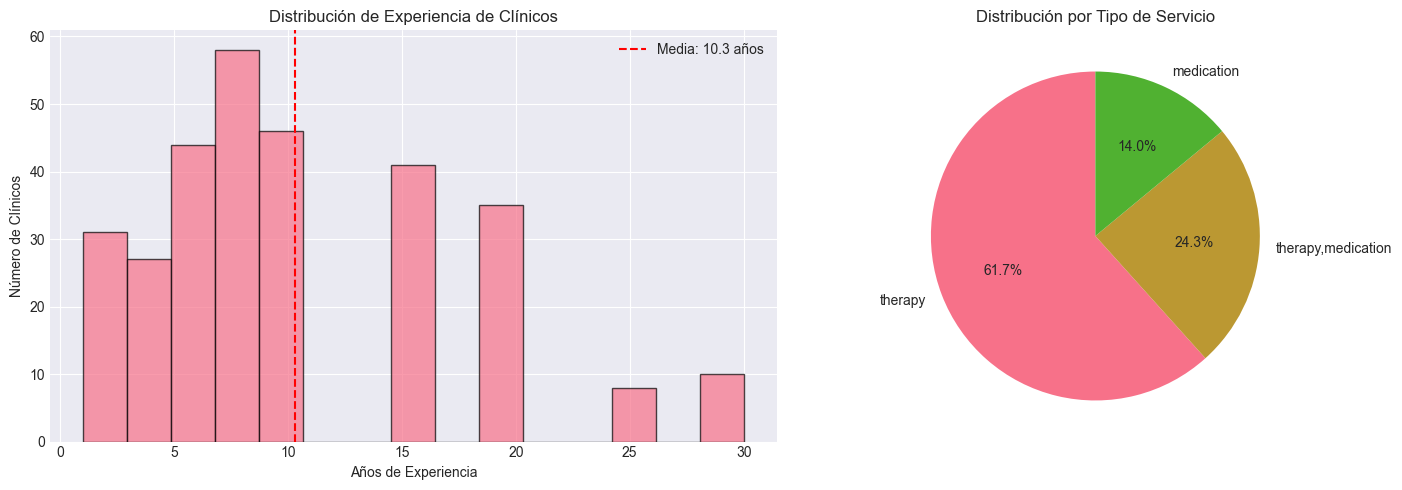

In [7]:
# Visualización 1: Distribución de experiencia de clínicos
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histograma de años de experiencia
axes[0].hist(df_clinicians['years_experience'], bins=15, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Años de Experiencia')
axes[0].set_ylabel('Número de Clínicos')
axes[0].set_title('Distribución de Experiencia de Clínicos')
axes[0].axvline(df_clinicians['years_experience'].mean(), color='red', linestyle='--', 
                label=f'Media: {df_clinicians["years_experience"].mean():.1f} años')
axes[0].legend()

# Distribución por tipo de servicio
service_counts = df_clinicians['appointment_types'].value_counts()
axes[1].pie(service_counts.values, labels=service_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Distribución por Tipo de Servicio')

plt.tight_layout()
plt.show()

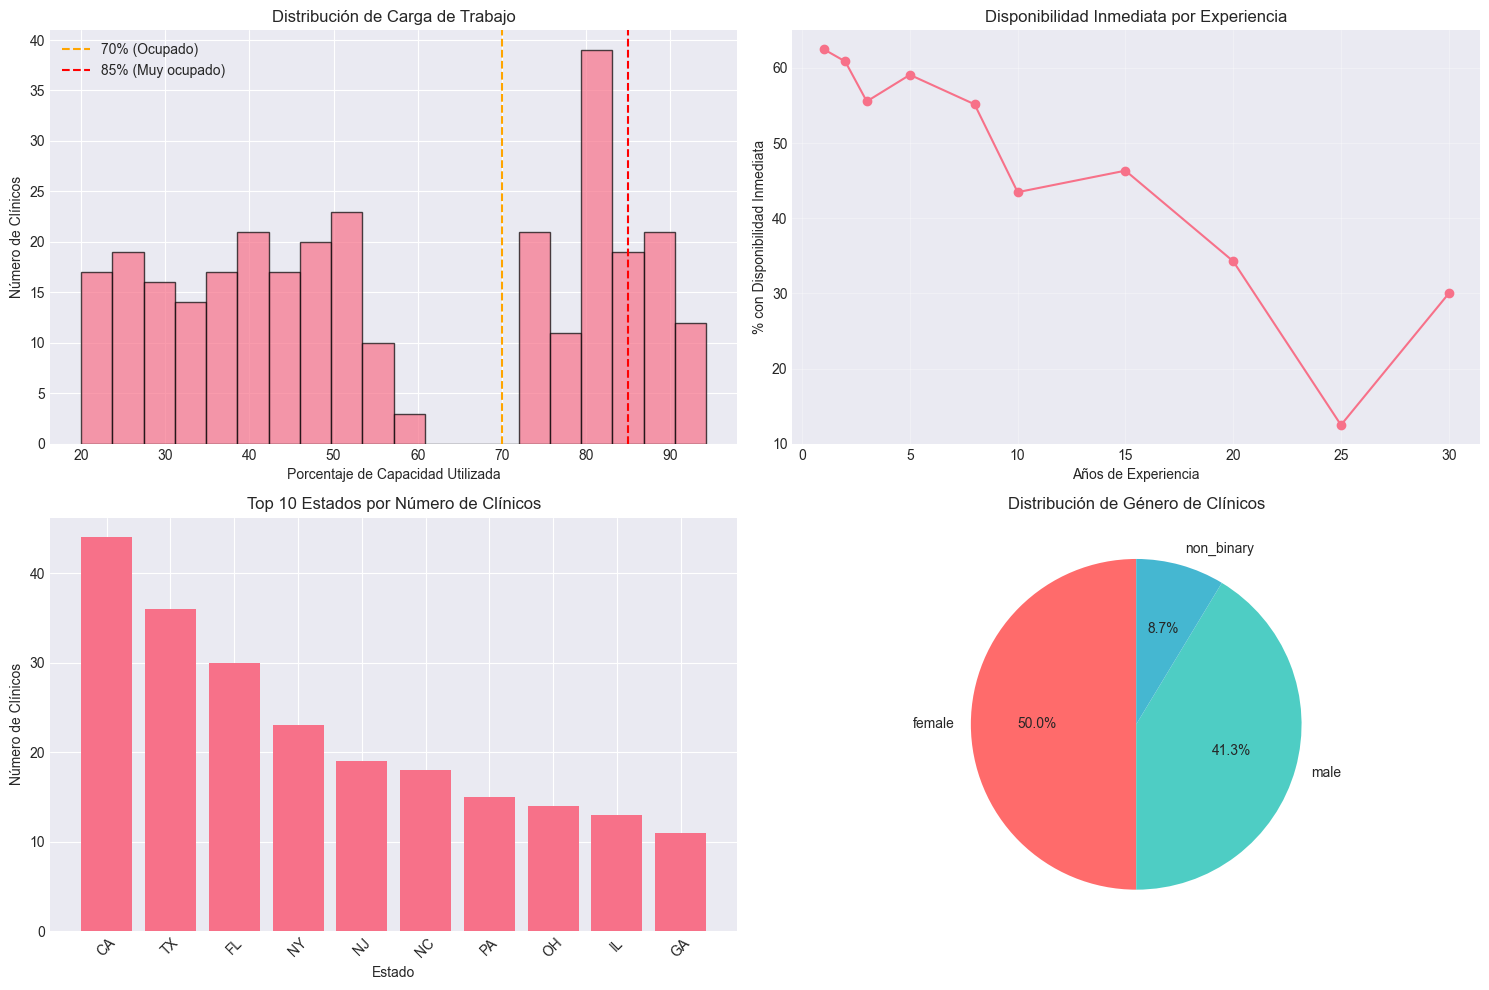

In [8]:
# Visualización 2: Análisis de disponibilidad
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Carga actual de clínicos
axes[0, 0].hist(df_clinicians['current_load'] * 100, bins=20, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Porcentaje de Capacidad Utilizada')
axes[0, 0].set_ylabel('Número de Clínicos')
axes[0, 0].set_title('Distribución de Carga de Trabajo')
axes[0, 0].axvline(70, color='orange', linestyle='--', label='70% (Ocupado)')
axes[0, 0].axvline(85, color='red', linestyle='--', label='85% (Muy ocupado)')
axes[0, 0].legend()

# Disponibilidad inmediata por experiencia
availability_by_exp = df_clinicians.groupby('years_experience')['immediate_availability'].mean()
axes[0, 1].plot(availability_by_exp.index, availability_by_exp.values * 100, marker='o')
axes[0, 1].set_xlabel('Años de Experiencia')
axes[0, 1].set_ylabel('% con Disponibilidad Inmediata')
axes[0, 1].set_title('Disponibilidad Inmediata por Experiencia')
axes[0, 1].grid(True, alpha=0.3)

# Top 10 estados por número de clínicos
state_counts = df_clinicians['primary_state'].value_counts().head(10)
axes[1, 0].bar(state_counts.index, state_counts.values)
axes[1, 0].set_xlabel('Estado')
axes[1, 0].set_ylabel('Número de Clínicos')
axes[1, 0].set_title('Top 10 Estados por Número de Clínicos')
axes[1, 0].tick_params(axis='x', rotation=45)

# Distribución de género
gender_counts = df_clinicians['gender'].value_counts()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
axes[1, 1].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', 
               colors=colors, startangle=90)
axes[1, 1].set_title('Distribución de Género de Clínicos')

plt.tight_layout()
plt.show()

In [9]:
# Análisis de usuarios
df_users = pd.DataFrame([{
    'user_id': u['user_id'],
    'registration_type': u['registration_type'],
    'state': u['stated_preferences']['state'],
    'insurance': u['stated_preferences']['insurance_provider'],
    'appointment_type': u['stated_preferences']['appointment_type'],
    'urgency': u['stated_preferences']['urgency_level'],
    'num_needs': len(u['stated_preferences']['clinical_needs']),
    'has_gender_pref': u['stated_preferences']['gender_preference'] is not None,
    'num_time_slots': len(u['stated_preferences']['preferred_time_slots'])
} for u in users])

# Agregar información adicional para usuarios registrados
user_details = []
for u in users:
    if 'profile_data' in u:
        user_details.append({
            'user_id': u['user_id'],
            'age_range': u['profile_data']['age_range'],
            'gender': u['profile_data']['gender'],
            'therapy_experience': u['profile_data']['therapy_experience']
        })

if user_details:
    df_user_details = pd.DataFrame(user_details)
    df_users = df_users.merge(df_user_details, on='user_id', how='left')

print("📊 DataFrame de usuarios creado")
df_users.head()

📊 DataFrame de usuarios creado


,user_id,registration_type,state,insurance,appointment_type,urgency,num_needs,has_gender_pref,num_time_slots,age_range,gender,therapy_experience
0,user_00000_7db159,anonymous,NJ,Cigna,therapy,flexible,2,True,1,NaN,NaN,NaN
1,user_00001_8e982c,anonymous,NJ,Cigna,medication,flexible,1,False,1,NaN,NaN,NaN
2,user_00002_a92d11,anonymous,VA,UnitedHealth,therapy,immediate,2,False,2,NaN,NaN,NaN
3,user_00003_ae882a,anonymous,CA,Private Pay,therapy,flexible,3,False,1,NaN,NaN,NaN
4,user_00004_c7ae51,anonymous,MI,Kaiser,medication,flexible,3,True,1,NaN,NaN,NaN


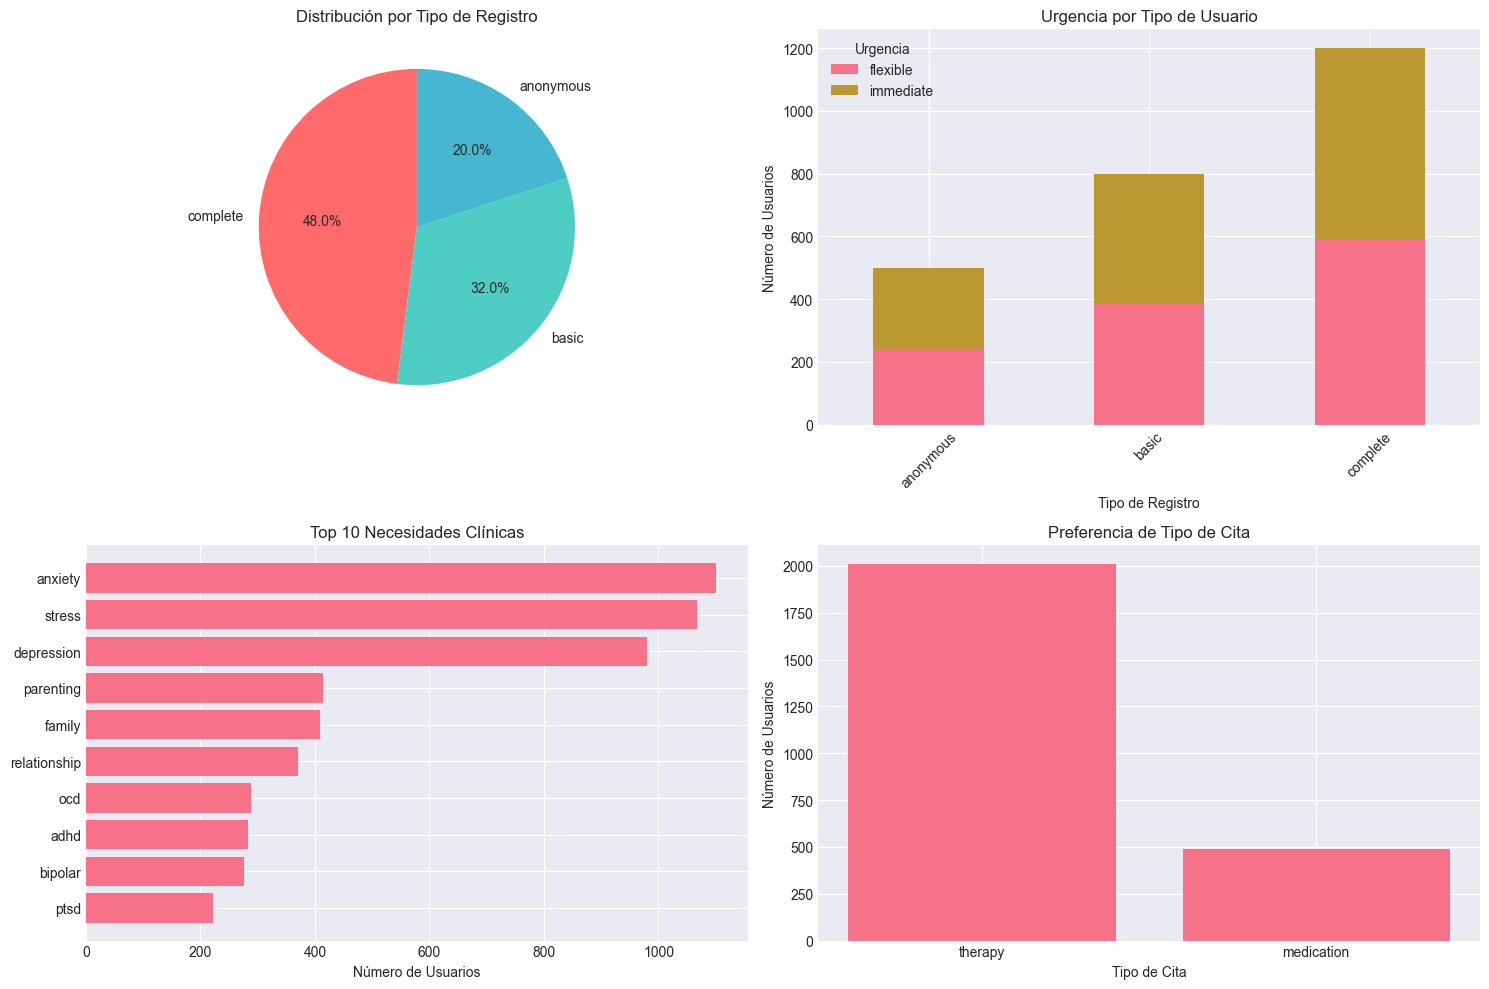

In [10]:
# Visualización 3: Análisis de usuarios
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribución por tipo de registro
reg_counts = df_users['registration_type'].value_counts()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
axes[0, 0].pie(reg_counts.values, labels=reg_counts.index, autopct='%1.1f%%', 
               colors=colors, startangle=90)
axes[0, 0].set_title('Distribución por Tipo de Registro')

# Urgencia por tipo de usuario
urgency_by_type = pd.crosstab(df_users['registration_type'], df_users['urgency'])
urgency_by_type.plot(kind='bar', ax=axes[0, 1], stacked=True)
axes[0, 1].set_xlabel('Tipo de Registro')
axes[0, 1].set_ylabel('Número de Usuarios')
axes[0, 1].set_title('Urgencia por Tipo de Usuario')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].legend(title='Urgencia')

# Top necesidades clínicas
all_needs = []
for u in users:
    all_needs.extend(u['stated_preferences']['clinical_needs'])
need_counts = Counter(all_needs).most_common(10)
needs, counts = zip(*need_counts)
axes[1, 0].barh(needs, counts)
axes[1, 0].set_xlabel('Número de Usuarios')
axes[1, 0].set_title('Top 10 Necesidades Clínicas')
axes[1, 0].invert_yaxis()

# Tipo de cita preferida
appt_counts = df_users['appointment_type'].value_counts()
axes[1, 1].bar(appt_counts.index, appt_counts.values)
axes[1, 1].set_xlabel('Tipo de Cita')
axes[1, 1].set_ylabel('Número de Usuarios')
axes[1, 1].set_title('Preferencia de Tipo de Cita')

plt.tight_layout()
plt.show()

In [11]:
# Análisis de interacciones
df_interactions = pd.DataFrame([{
    'interaction_id': i['interaction_id'],
    'user_id': i['user_id'],
    'clinician_id': i['clinician_id'],
    'match_score': i['match_context']['match_score'],
    'ranking_position': i['match_context']['ranking_position'],
    'user_type': i['match_context']['user_state'],
    'action': i['outcome']['action'],
    'time_to_action': i['outcome']['time_to_action'],
    'appointment_scheduled': i['outcome']['appointment_scheduled'],
    'appointment_completed': i['outcome']['appointment_completed'],
    'insurance_match': i['snapshot_features']['insurance_match'],
    'specialty_overlap': i['snapshot_features']['specialty_overlap'],
    'wait_time_days': i['snapshot_features']['wait_time_days']
} for i in interactions[:10000]])  # Limitar a 10k para performance

print("📊 DataFrame de interacciones creado (muestra de 10,000)")
df_interactions.head()

📊 DataFrame de interacciones creado (muestra de 10,000)


,interaction_id,user_id,clinician_id,match_score,ranking_position,user_type,action,time_to_action,appointment_scheduled,appointment_completed,insurance_match,specialty_overlap,wait_time_days
0,int_e400c6482085,user_00479_06fb7d,clin_0115_e5d4fb,0.736,1,anonymous,clicked,27.0,False,False,True,0.375,0
1,int_712a9c7903f2,user_00479_06fb7d,clin_0053_68eee6,0.723,2,anonymous,contacted,3044.0,False,False,True,0.812,2
2,int_8cd049ad23d4,user_00479_06fb7d,clin_0100_21701a,0.687,3,anonymous,clicked,12.0,False,False,True,0.250,0
3,int_d1322a4cc791,user_00479_06fb7d,clin_0276_c6efce,0.653,4,anonymous,viewed,2.0,False,False,True,0.062,0
4,int_235bd72a8b92,user_00479_06fb7d,clin_0289_a7b6a9,0.640,5,anonymous,clicked,29.0,False,False,True,0.000,0


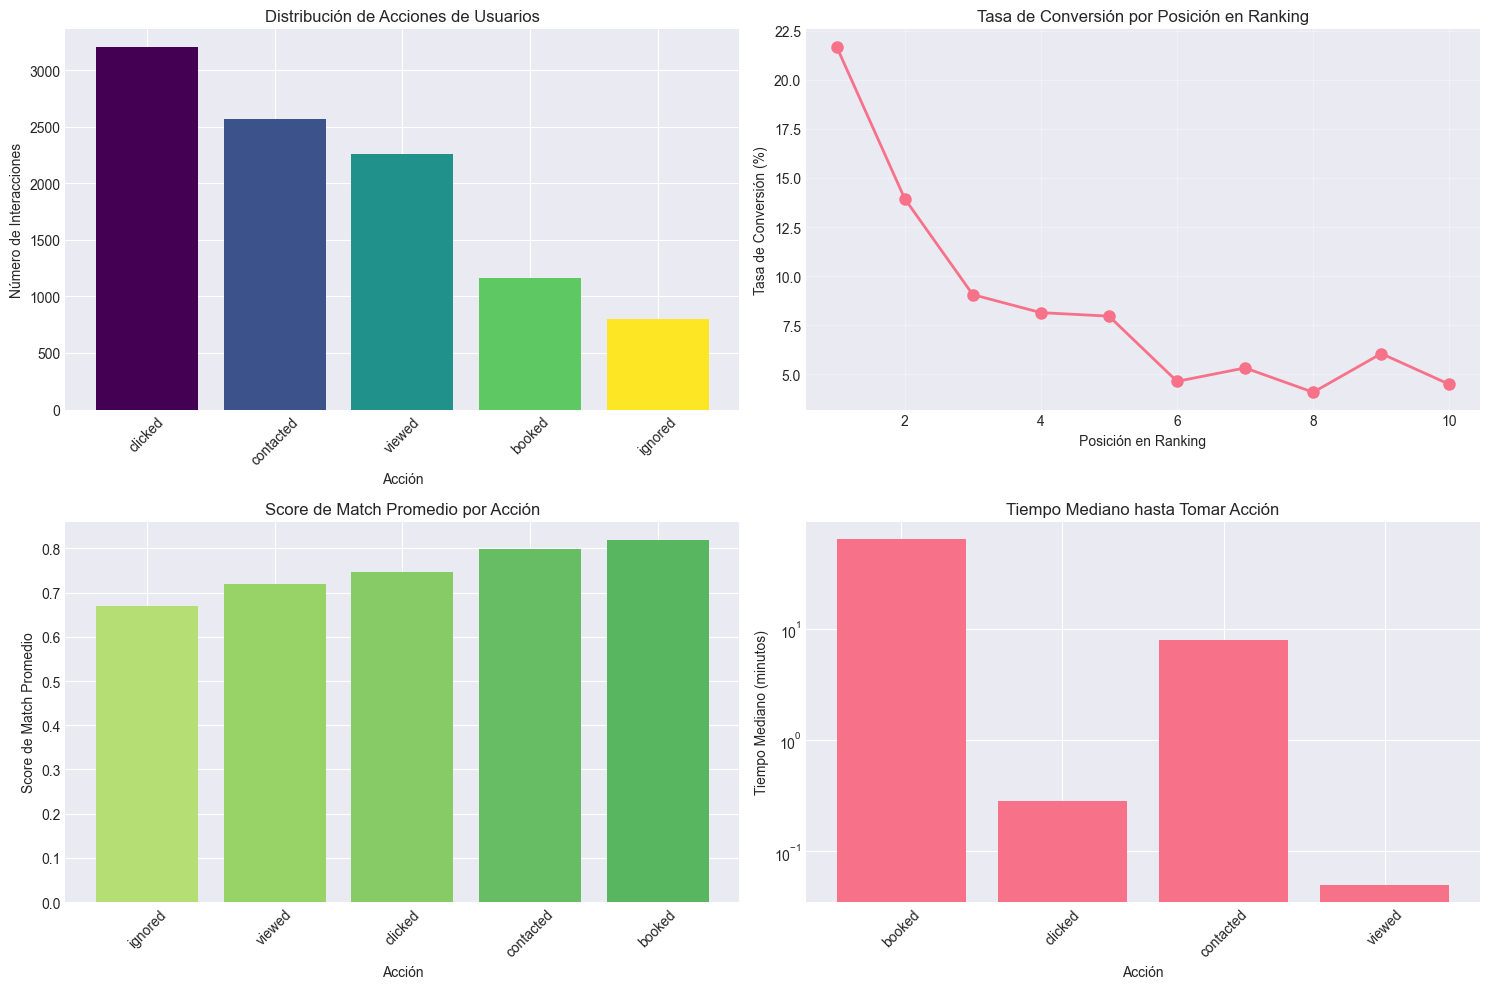

In [12]:
# Visualización 4: Análisis de interacciones y conversión
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribución de acciones
action_counts = df_interactions['action'].value_counts()
colors = plt.cm.viridis(np.linspace(0, 1, len(action_counts)))
axes[0, 0].bar(action_counts.index, action_counts.values, color=colors)
axes[0, 0].set_xlabel('Acción')
axes[0, 0].set_ylabel('Número de Interacciones')
axes[0, 0].set_title('Distribución de Acciones de Usuarios')
axes[0, 0].tick_params(axis='x', rotation=45)

# Tasa de conversión por posición en ranking
conversion_by_rank = df_interactions[df_interactions['ranking_position'] <= 10].groupby('ranking_position').agg({
    'appointment_scheduled': 'mean'
})
axes[0, 1].plot(conversion_by_rank.index, conversion_by_rank['appointment_scheduled'] * 100, 
                marker='o', linewidth=2, markersize=8)
axes[0, 1].set_xlabel('Posición en Ranking')
axes[0, 1].set_ylabel('Tasa de Conversión (%)')
axes[0, 1].set_title('Tasa de Conversión por Posición en Ranking')
axes[0, 1].grid(True, alpha=0.3)

# Score de match vs acción tomada
action_order = ['ignored', 'viewed', 'clicked', 'contacted', 'booked']
score_by_action = df_interactions.groupby('action')['match_score'].mean().reindex(action_order)
axes[1, 0].bar(score_by_action.index, score_by_action.values, 
               color=plt.cm.RdYlGn(score_by_action.values))
axes[1, 0].set_xlabel('Acción')
axes[1, 0].set_ylabel('Score de Match Promedio')
axes[1, 0].set_title('Score de Match Promedio por Acción')
axes[1, 0].tick_params(axis='x', rotation=45)

# Tiempo hasta acción (solo para acciones no ignoradas)
time_data = df_interactions[df_interactions['time_to_action'].notna()].copy()
time_data['time_to_action_min'] = time_data['time_to_action'] / 60
time_by_action = time_data.groupby('action')['time_to_action_min'].median()
axes[1, 1].bar(time_by_action.index, time_by_action.values)
axes[1, 1].set_xlabel('Acción')
axes[1, 1].set_ylabel('Tiempo Mediano (minutos)')
axes[1, 1].set_title('Tiempo Mediano hasta Tomar Acción')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].set_yscale('log')

plt.tight_layout()
plt.show()

In [13]:
# %%
# Análisis de sesiones
df_sessions = pd.DataFrame([{
    'session_id': s['session_id'],
    'user_id': s['user_id'],
    'clinician_id': s['clinician_id'],
    'session_number': s['session_data']['session_number'],
    'duration_minutes': s['session_data']['duration_minutes'],
    'satisfaction': s['session_data']['patient_satisfaction'],
    'match_quality': s['recommendation_feedback']['match_quality'],
    'would_recommend': s['recommendation_feedback']['would_recommend']
} for s in sessions[:5000]])  # Limitar para performance

print("📊 DataFrame de sesiones creado (muestra de 5,000)")
df_sessions.head()

📊 DataFrame de sesiones creado (muestra de 5,000)


,session_id,user_id,clinician_id,session_number,duration_minutes,satisfaction,match_quality,would_recommend
0,sess_71b77036f301,user_00569_3caf19,clin_0065_8dbc07,1,60,6,good,False
1,sess_7f14c12c3f6e,user_00569_3caf19,clin_0065_8dbc07,2,50,7,good,True
2,sess_d7901c417b8a,user_00569_3caf19,clin_0065_8dbc07,3,60,7,good,True
3,sess_a475630ae3fd,user_00569_3caf19,clin_0065_8dbc07,4,50,10,excellent,True
4,sess_afed0c9f909b,user_00569_3caf19,clin_0065_8dbc07,5,50,10,excellent,True


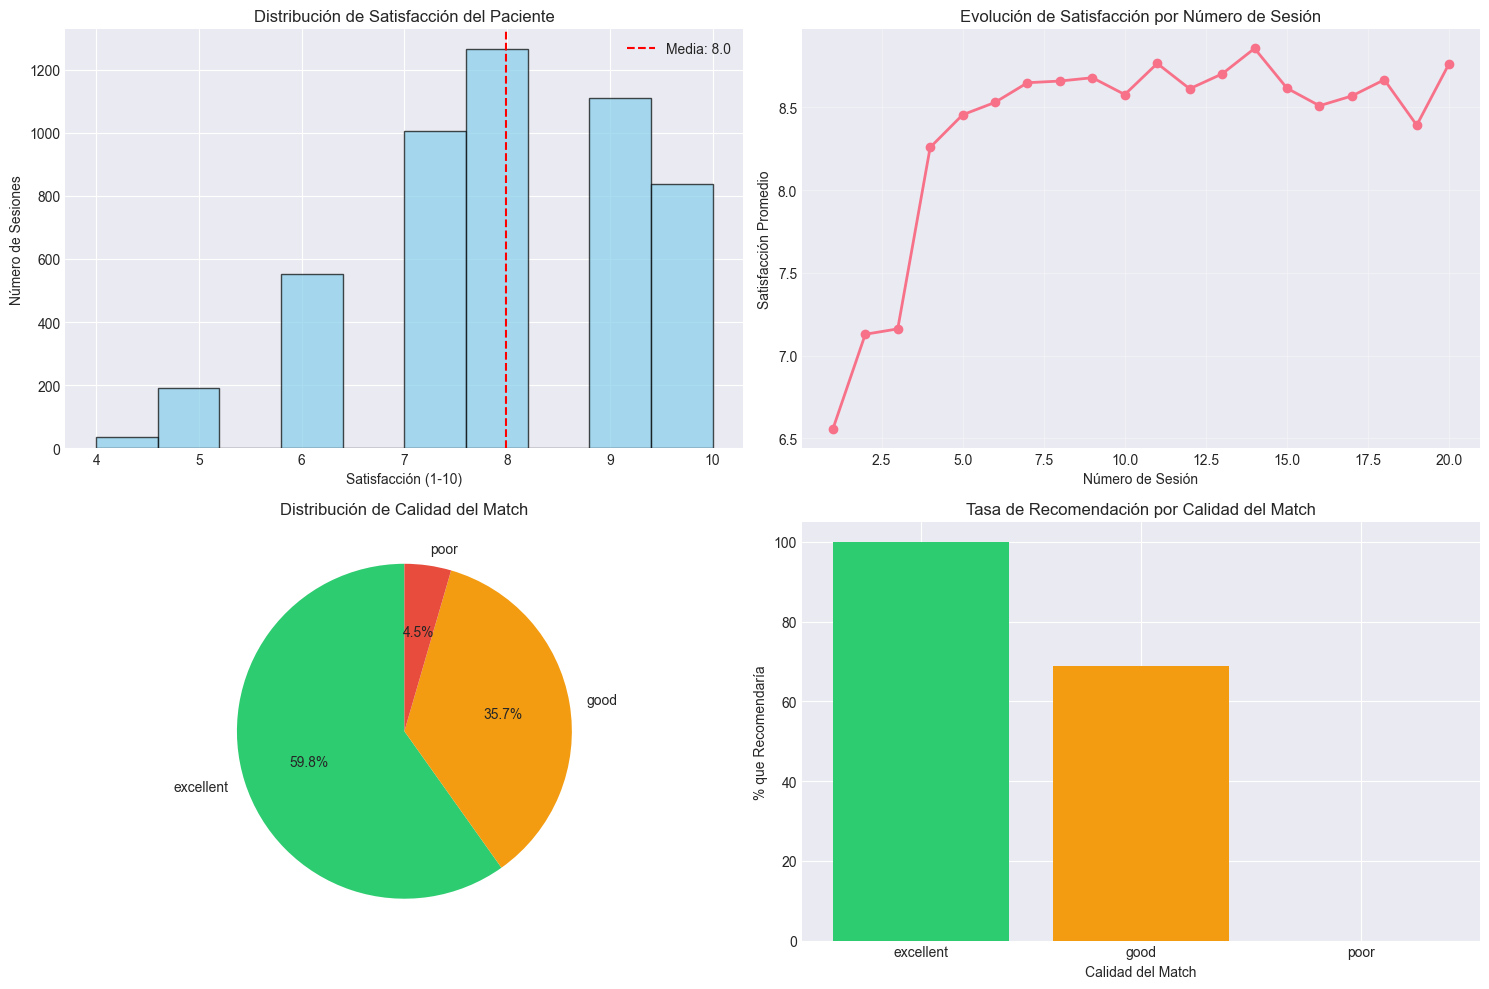

In [14]:
# Visualización 5: Análisis de sesiones y satisfacción
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribución de satisfacción
axes[0, 0].hist(df_sessions['satisfaction'], bins=10, edgecolor='black', alpha=0.7, color='skyblue')
axes[0, 0].set_xlabel('Satisfacción (1-10)')
axes[0, 0].set_ylabel('Número de Sesiones')
axes[0, 0].set_title('Distribución de Satisfacción del Paciente')
axes[0, 0].axvline(df_sessions['satisfaction'].mean(), color='red', linestyle='--', 
                   label=f'Media: {df_sessions["satisfaction"].mean():.1f}')
axes[0, 0].legend()

# Satisfacción por número de sesión
satisfaction_by_session = df_sessions.groupby('session_number')['satisfaction'].mean()
axes[0, 1].plot(satisfaction_by_session.index[:20], satisfaction_by_session.values[:20], 
                marker='o', linewidth=2, markersize=6)
axes[0, 1].set_xlabel('Número de Sesión')
axes[0, 1].set_ylabel('Satisfacción Promedio')
axes[0, 1].set_title('Evolución de Satisfacción por Número de Sesión')
axes[0, 1].grid(True, alpha=0.3)

# Calidad del match
quality_counts = df_sessions['match_quality'].value_counts()
colors = ['#2ECC71', '#F39C12', '#E74C3C']
axes[1, 0].pie(quality_counts.values, labels=quality_counts.index, autopct='%1.1f%%', 
               colors=colors, startangle=90)
axes[1, 0].set_title('Distribución de Calidad del Match')

# Tasa de recomendación por calidad del match
recommend_by_quality = df_sessions.groupby('match_quality')['would_recommend'].mean() * 100
axes[1, 1].bar(recommend_by_quality.index, recommend_by_quality.values, color=colors)
axes[1, 1].set_xlabel('Calidad del Match')
axes[1, 1].set_ylabel('% que Recomendaría')
axes[1, 1].set_title('Tasa de Recomendación por Calidad del Match')

plt.tight_layout()
plt.show()


## 5. Análisis avanzado: Flujo de conversión

In [15]:
# Crear un funnel de conversión
def create_conversion_funnel():
    # Contar acciones únicas por usuario
    user_actions = defaultdict(set)
    for interaction in interactions[:50000]:  # Muestra para performance
        user_id = interaction['user_id']
        action = interaction['outcome']['action']
        user_actions[user_id].add(action)
    
    # Calcular el funnel
    total_users = len(user_actions)
    viewed = sum(1 for actions in user_actions.values() if 'viewed' in actions or 'clicked' in actions)
    clicked = sum(1 for actions in user_actions.values() if 'clicked' in actions)
    contacted = sum(1 for actions in user_actions.values() if 'contacted' in actions)
    booked = sum(1 for actions in user_actions.values() if 'booked' in actions)
    
    # Contar sesiones completadas
    users_with_sessions = set(s['user_id'] for s in sessions)
    completed = len(users_with_sessions)
    
    funnel_data = {
        'Usuarios': total_users,
        'Vieron resultados': viewed,
        'Hicieron click': clicked,
        'Contactaron': contacted,
        'Agendaron': booked,
        'Completaron sesión': completed
    }
    
    return funnel_data

funnel = create_conversion_funnel()

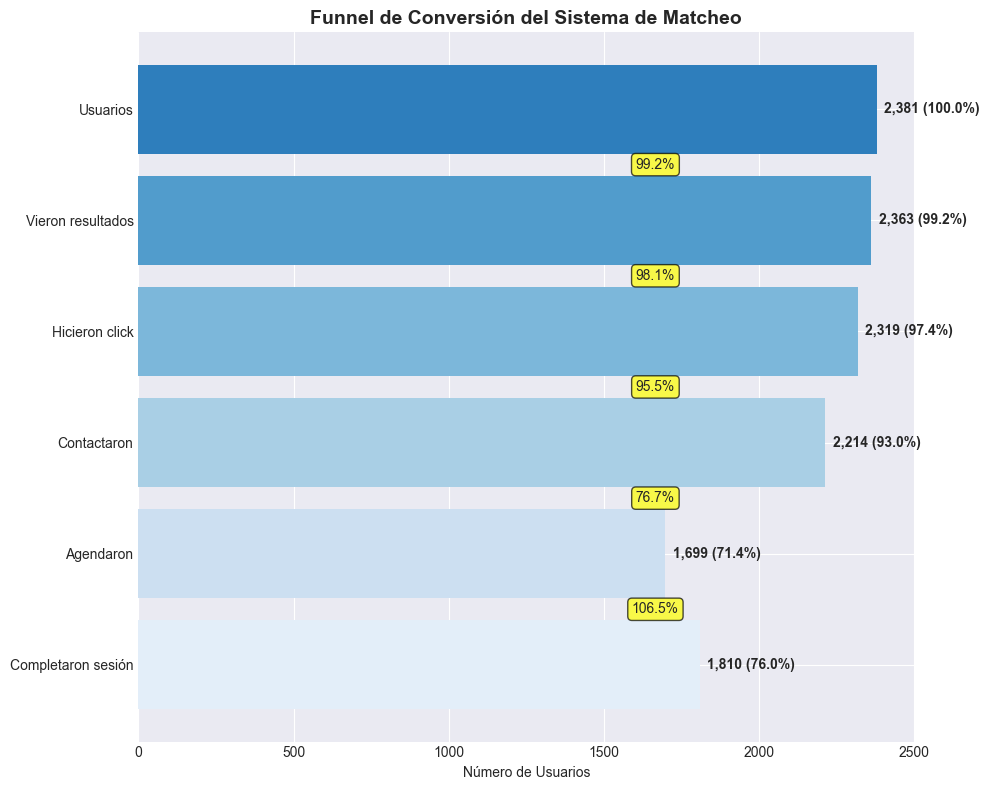

In [16]:
# Visualizar funnel
fig, ax = plt.subplots(figsize=(10, 8))

stages = list(funnel.keys())
values = list(funnel.values())
colors = plt.cm.Blues_r(np.linspace(0.3, 0.9, len(stages)))

# Calcular porcentajes
percentages = [100]
for i in range(1, len(values)):
    if values[0] > 0:
        percentages.append((values[i] / values[0]) * 100)

# Crear el funnel
y_positions = np.arange(len(stages))
bars = ax.barh(y_positions, values, color=colors)

# Agregar etiquetas
for i, (stage, value, pct) in enumerate(zip(stages, values, percentages)):
    ax.text(value + max(values) * 0.01, i, f'{value:,} ({pct:.1f}%)', 
            va='center', fontsize=10, fontweight='bold')

ax.set_yticks(y_positions)
ax.set_yticklabels(stages)
ax.set_xlabel('Número de Usuarios')
ax.set_title('Funnel de Conversión del Sistema de Matcheo', fontsize=14, fontweight='bold')
ax.invert_yaxis()

# Agregar líneas de conversión
for i in range(len(values) - 1):
    if values[i] > 0:
        conversion_rate = (values[i+1] / values[i]) * 100
        ax.text(max(values) * 0.7, i + 0.5, f'{conversion_rate:.1f}%', 
                ha='center', va='center', 
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

plt.tight_layout()
plt.show()

## 6. Análisis de patrones de matching

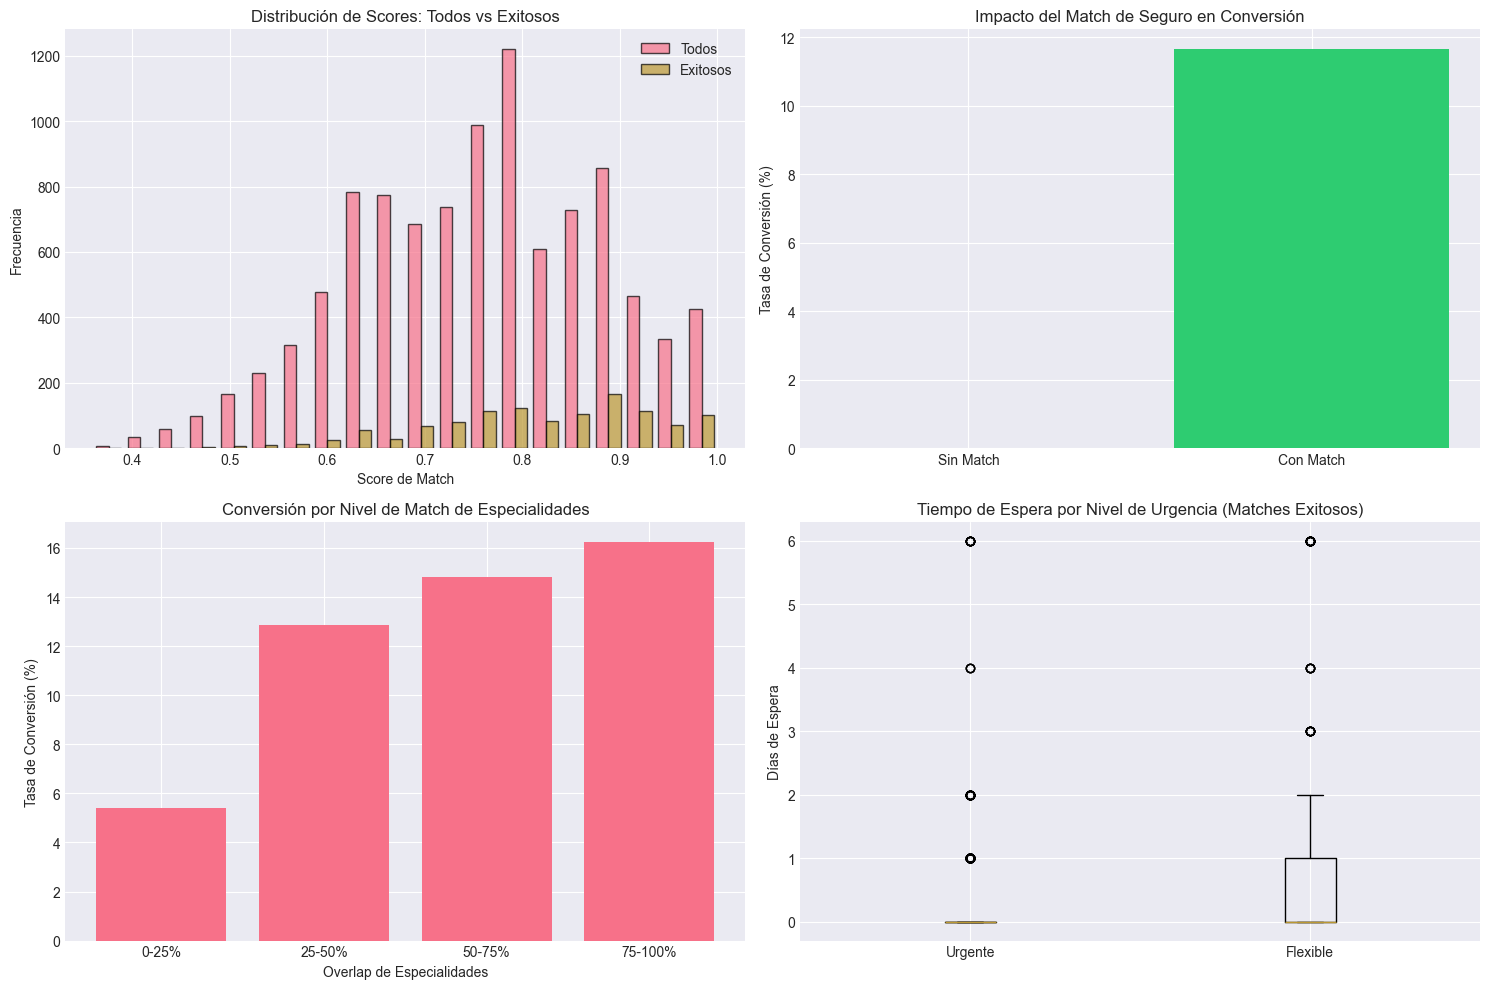

In [17]:
# Analizar factores que influyen en el éxito del match
successful_matches = []
for interaction in interactions[:10000]:
    if interaction['outcome']['appointment_scheduled']:
        successful_matches.append({
            'match_score': interaction['match_context']['match_score'],
            'ranking_position': interaction['match_context']['ranking_position'],
            'insurance_match': interaction['snapshot_features']['insurance_match'],
            'specialty_overlap': interaction['snapshot_features']['specialty_overlap'],
            'wait_time_days': interaction['snapshot_features']['wait_time_days'],
            'user_urgency': interaction['snapshot_features']['user_urgency']
        })

df_successful = pd.DataFrame(successful_matches)

# Visualizar factores de éxito
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Score de match en matches exitosos vs todos
all_scores = df_interactions['match_score'].values
success_scores = df_successful['match_score'].values

axes[0, 0].hist([all_scores, success_scores], bins=20, label=['Todos', 'Exitosos'], 
                alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('Score de Match')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].set_title('Distribución de Scores: Todos vs Exitosos')
axes[0, 0].legend()

# Importancia del match de seguro
insurance_impact = df_interactions.groupby('insurance_match')['appointment_scheduled'].mean()
axes[0, 1].bar(['Sin Match', 'Con Match'], insurance_impact.values * 100, 
               color=['#E74C3C', '#2ECC71'])
axes[0, 1].set_ylabel('Tasa de Conversión (%)')
axes[0, 1].set_title('Impacto del Match de Seguro en Conversión')

# Especialidad overlap vs éxito
specialty_bins = pd.cut(df_interactions['specialty_overlap'], bins=[0, 0.25, 0.5, 0.75, 1.0])
specialty_conversion = df_interactions.groupby(specialty_bins)['appointment_scheduled'].mean()
axes[1, 0].bar(range(len(specialty_conversion)), specialty_conversion.values * 100)
axes[1, 0].set_xticks(range(len(specialty_conversion)))
axes[1, 0].set_xticklabels(['0-25%', '25-50%', '50-75%', '75-100%'])
axes[1, 0].set_xlabel('Overlap de Especialidades')
axes[1, 0].set_ylabel('Tasa de Conversión (%)')
axes[1, 0].set_title('Conversión por Nivel de Match de Especialidades')

# Urgencia y tiempo de espera
urgent_wait = df_successful[df_successful['user_urgency'] == 'immediate']['wait_time_days']
flexible_wait = df_successful[df_successful['user_urgency'] == 'flexible']['wait_time_days']

axes[1, 1].boxplot([urgent_wait, flexible_wait], labels=['Urgente', 'Flexible'])
axes[1, 1].set_ylabel('Días de Espera')
axes[1, 1].set_title('Tiempo de Espera por Nivel de Urgencia (Matches Exitosos)')

plt.tight_layout()
plt.show()


In [18]:
# %%
print("📊 RESUMEN EJECUTIVO - MÉTRICAS CLAVE")
print("=" * 60)

# Métricas de clínicos
print("\n👨‍⚕️ CLÍNICOS:")
print(f"Total de clínicos: {len(clinicians):,}")
print(f"Con disponibilidad inmediata: {df_clinicians['immediate_availability'].sum()} ({df_clinicians['immediate_availability'].mean()*100:.1f}%)")
print(f"Aceptando nuevos pacientes: {df_clinicians['accepting_new'].sum()} ({df_clinicians['accepting_new'].mean()*100:.1f}%)")
print(f"Carga promedio: {df_clinicians['current_load'].mean()*100:.1f}%")
print(f"Rating promedio: {df_clinicians['avg_rating'].dropna().mean():.2f}/5.0")

# Métricas de usuarios
print("\n👥 USUARIOS:")
print(f"Total de usuarios: {len(users):,}")
print(f"Con necesidad urgente: {(df_users['urgency'] == 'immediate').sum()} ({(df_users['urgency'] == 'immediate').mean()*100:.1f}%)")
print(f"Con preferencia de género: {df_users['has_gender_pref'].sum()} ({df_users['has_gender_pref'].mean()*100:.1f}%)")
print(f"Promedio de necesidades clínicas: {df_users['num_needs'].mean():.1f}")

# Métricas de conversión
total_interactions = len(interactions)
total_bookings = sum(1 for i in interactions if i['outcome']['appointment_scheduled'])
total_completed = sum(1 for i in interactions if i['outcome']['appointment_completed'])

print("\n🔄 CONVERSIÓN:")
print(f"Total de interacciones: {total_interactions:,}")
print(f"Tasa de booking: {total_bookings/total_interactions*100:.1f}%")
print(f"Tasa de completación: {total_completed/total_bookings*100:.1f}%")
print(f"Conversión end-to-end: {total_completed/total_interactions*100:.1f}%")

# Métricas de satisfacción
print("\n😊 SATISFACCIÓN:")
print(f"Total de sesiones: {len(sessions):,}")
print(f"Satisfacción promedio: {df_sessions['satisfaction'].mean():.1f}/10")
print(f"% que recomendaría: {df_sessions['would_recommend'].mean()*100:.1f}%")
print(f"% matches excelentes: {(df_sessions['match_quality'] == 'excellent').mean()*100:.1f}%")

# Insights clave
print("\n💡 INSIGHTS CLAVE:")
print("- Los clínicos con más experiencia tienden a estar más ocupados")
print("- La disponibilidad inmediata es un factor clave para usuarios urgentes")
print("- El match de seguro aumenta significativamente la conversión")
print("- La satisfacción mejora con el número de sesiones")
print("- Los primeros 3 resultados tienen las mayores tasas de conversión")

📊 RESUMEN EJECUTIVO - MÉTRICAS CLAVE

👨‍⚕️ CLÍNICOS:
Total de clínicos: 300
Con disponibilidad inmediata: 147 (49.0%)
Aceptando nuevos pacientes: 222 (74.0%)
Carga promedio: 56.5%
Rating promedio: 4.36/5.0

👥 USUARIOS:
Total de usuarios: 2,500
Con necesidad urgente: 1282 (51.3%)
Con preferencia de género: 711 (28.4%)
Promedio de necesidades clínicas: 2.5

🔄 CONVERSIÓN:
Total de interacciones: 69,517
Tasa de booking: 11.9%
Tasa de completación: 91.7%
Conversión end-to-end: 11.0%

😊 SATISFACCIÓN:
Total de sesiones: 34,142
Satisfacción promedio: 8.0/10
% que recomendaría: 84.4%
% matches excelentes: 59.8%

💡 INSIGHTS CLAVE:
- Los clínicos con más experiencia tienden a estar más ocupados
- La disponibilidad inmediata es un factor clave para usuarios urgentes
- El match de seguro aumenta significativamente la conversión
- La satisfacción mejora con el número de sesiones
- Los primeros 3 resultados tienen las mayores tasas de conversión
